In [153]:
import os
from pathlib import Path
from keras.preprocessing import image

In [187]:
p = Path('Machine Learning/Pokemon_Image_Classifier_MLP/dataset2')
dir = p.glob("*")

labels_data = [] # list of all the images labelled in integer 
                 # form after mapping
img_data = []
label_mapping = {"Bulbasaur":1,
                 "Dragonair":2,
                 "Pikachu":0}
label2pokemon = {0:"Pikachu",
                 1:"Bulbasaur",
                 2:"Dragonair"}
for folder_dir in dir:
    label = str(folder_dir).split("\\")[-1]
    print(label)
    count = 0   # Counts number of images per folder or label.
    for img_path in folder_dir.glob("*.jpg"):
        img = image.load_img(img_path,target_size=(40,40))
        image_array = image.img_to_array(img)
        img_data.append(image_array)
        labels_data.append(label_mapping[label])
        count +=1
    print(count)

Bulbasaur


176
Dragonair


65
Pikachu


199


In [197]:
import numpy as np

X = np.array(img_data)
Y = np.array(labels_data)
print(len(np.unique(Y)))
print(X.shape,Y.shape)

3
(440, 40, 40, 3) (440,)


In [189]:
import matplotlib.pyplot as plt
def drawImage(img,label):
    plt.title(label2pokemon[label])
    plt.imshow(img/255.0)
    plt.axis('off')
    plt.show()

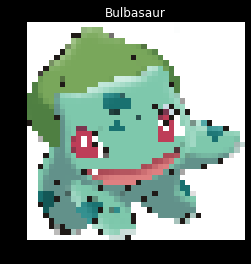

In [190]:
drawImage(X[0],Y[0])

In [191]:
from sklearn.utils import shuffle
X,Y = shuffle(X,Y,random_state=2)

In [192]:
X_ = np.array(X)
Y_ = np.array(Y)

#Training Set
X = X_[:300,:]
Y = Y_[:300]

#Test Set
XTest = X_[300:,:]
YTest = Y_[300:]

print(X.shape,Y.shape)
print(XTest.shape,YTest.shape)

(300, 40, 40, 3) (300,)
(140, 40, 40, 3) (140,)


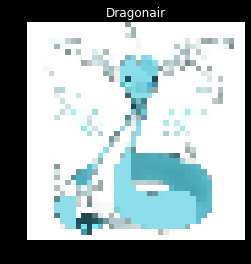

In [193]:
drawImage(X[0],Y[0])

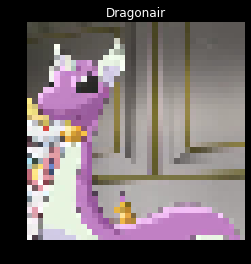

In [194]:
drawImage(XTest[0],YTest[0])

In [162]:
class NeuralNetwork:
    
    def __init__(self,input_size,layers,output_size):
        np.random.seed(0)
        
        model = {} #Dictionary
        
        #First Layer
        model['W1'] = np.random.randn(input_size,layers[0])
        model['b1'] = np.zeros((1,layers[0]))
        
        #Second Layer
        model['W2'] = np.random.randn(layers[0],layers[1])
        model['b2'] = np.zeros((1,layers[1]))
        
        #Third/Output Layer
        model['W3'] = np.random.randn(layers[1],output_size)
        model['b3'] = np.zeros((1,output_size))
        
        self.model = model
        self.activation_outputs = None
    
    def forward(self,x):
        
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        
        z1 = np.dot(x,W1) + b1
        a1 = np.tanh(z1) 
        
        z2 = np.dot(a1,W2) + b2
        a2 = np.tanh(z2)
        
        z3 = np.dot(a2,W3) + b3
        y_ = softmax(z3)
        
        self.activation_outputs = (a1,a2,y_)
        return y_
        
    def backward(self,x,y,learning_rate=0.001):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        b1, b2, b3 = self.model['b1'],self.model['b2'],self.model['b3']
        m = x.shape[0]
        
        a1,a2,y_ = self.activation_outputs
        
        delta3 = y_ - y
        dw3 = np.dot(a2.T,delta3)
        db3 = np.sum(delta3,axis=0)
        
        delta2 = (1-np.square(a2))*np.dot(delta3,W3.T)
        dw2 = np.dot(a1.T,delta2)
        db2 = np.sum(delta2,axis=0)
        
        delta1 = (1-np.square(a1))*np.dot(delta2,W2.T)
        dw1 = np.dot(X.T,delta1)
        db1 = np.sum(delta1,axis=0)
        
        
        #Update the Model Parameters using Gradient Descent
        self.model["W1"]  -= learning_rate*dw1
        self.model['b1']  -= learning_rate*db1
        
        self.model["W2"]  -= learning_rate*dw2
        self.model['b2']  -= learning_rate*db2
        
        self.model["W3"]  -= learning_rate*dw3
        self.model['b3']  -= learning_rate*db3
        
        # :)
        
    def predict(self,x):
        y_out = self.forward(x)
        return np.argmax(y_out,axis=1)
    
    def summary(self):
        W1,W2,W3 = self.model['W1'],self.model['W2'],self.model['W3']
        a1,a2,y_ = self.activation_outputs
        
        print("W1 ",W1.shape)
        print("A1 ",a1.shape)

def softmax(a):
    e_pa = np.exp(a) #Vector
    ans = e_pa/np.sum(e_pa,axis=1,keepdims=True)
    return ans

In [163]:
def loss(y_oht,p):
    l = -np.mean(y_oht*np.log(p))
    return l

def one_hot(y,depth):
    
    m = y.shape[0]
    y_oht = np.zeros((m,depth))
    y_oht[np.arange(m),y] = 1
    return y_oht

def train(X,Y,model,epochs,learning_rate,logs=True):
    training_loss = []
    
    classes = len(np.unique(Y))
    Y_OHT = one_hot(Y,classes)
    
    for ix in range(epochs):
        
        Y_ = model.forward(X)
        l = loss(Y_OHT,Y_)
        
        model.backward(X,Y_OHT,learning_rate)
        training_loss.append(l)
        if(logs and ix%50==0):
            print("Epoch %d Loss %.4f"%(ix,l))
            
            
    
    return training_loss

In [164]:
X = X.reshape(X.shape[0],-1)
print(X.shape)

XTest = XTest.reshape(XTest.shape[0],-1)
print(XTest.shape)

(300, 4800)
(140, 4800)


In [165]:
model = NeuralNetwork(4800,[100,50],3)

In [166]:

np.unique(Y)

array([0, 1, 2])

In [167]:
l = train(X,Y,model,500,0.0002)

Epoch 0 Loss 3.2349


Epoch 50 Loss 0.4941


Epoch 100 Loss 0.2746


Epoch 150 Loss 0.1948


Epoch 200 Loss 0.1476


Epoch 250 Loss 0.1207


Epoch 300 Loss 0.1027


Epoch 350 Loss 0.0892


Epoch 400 Loss 0.0785


Epoch 450 Loss 0.0694


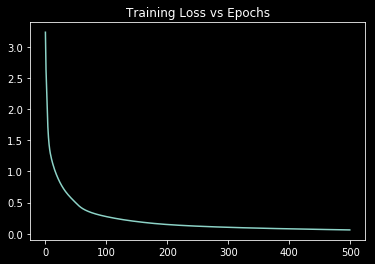

In [168]:
plt.style.use("dark_background")
plt.title("Training Loss vs Epochs")
plt.plot(l)

plt.show()

In [169]:
# Accuracy 
def getAccuracy(X,Y,model):
    outputs = model.predict(X)
    acc = np.sum(outputs==Y)/Y.shape[0]
    return acc
    
print("Train Acc %.4f"%getAccuracy(X,Y,model))
print("Test Acc %.4f"%getAccuracy(XTest,YTest,model))

Train Acc 0.9567
Test Acc 0.6357


In [170]:

from sklearn.metrics import confusion_matrix
import visualize

In [171]:
outputs = model.predict(X)
cnf_matrix = confusion_matrix(outputs,Y)
print(cnf_matrix)

[[132   4   2]
 [  2 113   2]
 [  2   1  42]]


Confusion matrix, without normalization
[[132   4   2]
 [  2 113   2]
 [  2   1  42]]


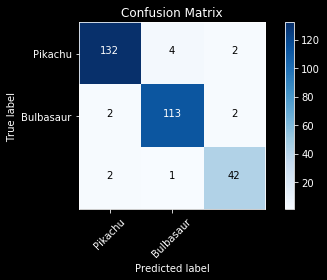

In [172]:
visualize.plot_confusion_matrix(cnf_matrix,classes=["Pikachu","Bulbasaur"],title="Confusion Matrix")

In [173]:
from sklearn.metrics import classification_report

In [174]:
print(classification_report(outputs,Y))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       138
           1       0.96      0.97      0.96       117
           2       0.91      0.93      0.92        45

   micro avg       0.96      0.96      0.96       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.96      0.96      0.96       300



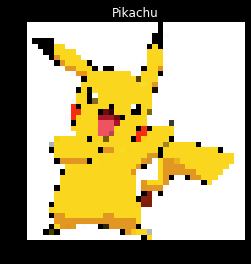

Prediction 4 Bulbasaur


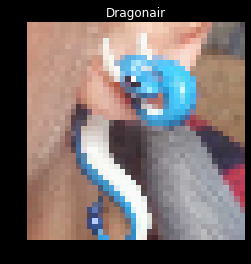

Prediction 11 Pikachu


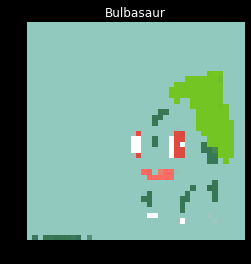

Prediction 43 Pikachu


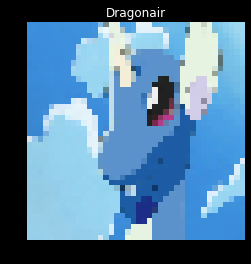

Prediction 75 Bulbasaur


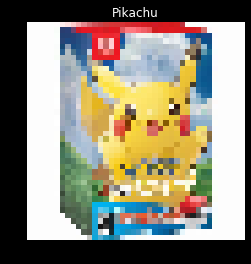

Prediction 78 Dragonair


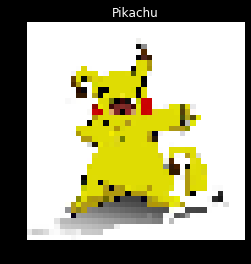

Prediction 115 Bulbasaur


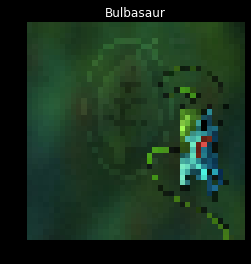

Prediction 173 Pikachu


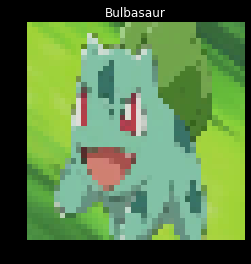

Prediction 183 Pikachu


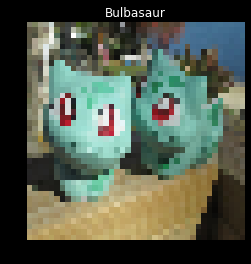

Prediction 201 Pikachu


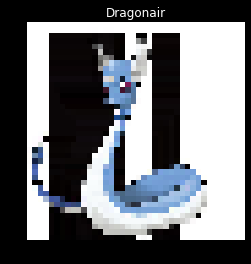

Prediction 210 Bulbasaur


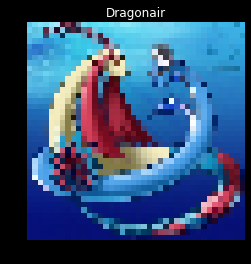

Prediction 211 Pikachu


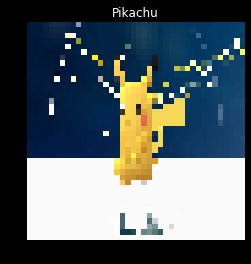

Prediction 235 Dragonair


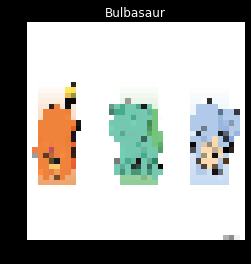

Prediction 256 Dragonair


In [195]:

for i in range(Y.shape[0]):
    if Y[i] != outputs[i]:
        drawImage(X[i],Y[i])
        print("Prediction %d %s"%(i,label2pokemon[outputs[i]]))